# Lasso-Regression

Lasso Regression = Linear-Regression with L1-Regularization
Helps in preventing Overfitting of data

## Cost Function

`J(lasso)=MSE + lambda*sum(|wts|)/2m`

## Gradient Descent

    if w[i]<0:

        dw[i]=(-(2*(X[:,i]).dot(y - Y_prediction)) + self.regularization_parameter) / m

    else:

        (-(2*(X[:,i]).dot(y - Y_prediction)) - self.regularization_parameter) / m



    db=np.sum(y-y_prediction)


In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline


In [214]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [215]:
X,y=load_boston(return_X_y=True)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [217]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
class LassoRegression:
    def __init__(self, learning_rate=0.1, num_iter=100, regularization_parameter=0.1):
        self.learning_rate = learning_rate
        self.regularization_parameter = regularization_parameter
        self.num_iter = num_iter

    def fit(self, X, y):
        def updateWtsAndBias(X, y):
            m, n = X.shape
            Y_prediction = self.predict(X)

            # gradient for weight
            dw = np.zeros(n)

            for i in range(n):
                if self.wts[i]>0:
                    dw[i] = (-(2*(X[:,i]).dot(y - Y_prediction)) + self.regularization_parameter) /m 
                else :
                    dw[i] = (-(2*(X[:,i]).dot(y - Y_prediction)) - self.regularization_parameter) /m
            # gradient for bias
            db = - 2 * np.sum(y - Y_prediction) / m

            self.wts -= self.learning_rate*dw
            self.bias -= self.learning_rate*db

        m, n = X.shape
        self.wts = np.random.randn(n)
        self.bias = 0

        for _ in range(self.num_iter):
            updateWtsAndBias(X, y)

    def predict(self, X):
        y_pred = np.dot(X, self.wts.T)+self.bias
        return y_pred

In [219]:
my_model = LassoRegression()
my_model.fit(X_train_scaled, y_train)
y_pred = my_model.predict(X_test_scaled)
y_pred

array([30.5486055 , -5.24574521, 22.81956744, 22.1017838 , 13.16878435,
       26.91686057, 12.33115904, 22.67240325, 16.28824053, 20.64286366,
       15.59196921, 24.04891728, 16.43424722, 25.30045466, 13.02342894,
       31.09594591, 24.1107234 , 13.52001186, 31.5775465 , 27.44369061,
       18.01202624,  5.34898625, 20.9489834 , 36.18339499, 34.63209556,
       30.06259706, 12.31307935, 28.91992334, 11.20043702, 20.42985824,
        4.07842191, 34.06798781, 23.04210869, 13.87562368, 23.4479132 ,
       23.72065901, 17.01628583, 27.60477759, 22.61087355, 10.98457721,
        7.88445193, 18.81195221, 20.34588061, 25.06927333,  7.8350729 ,
       12.56892554, 24.72795398, 24.20269843, 18.96917328, 16.6882655 ,
       25.36825147, 19.80703996, 25.54742898, 32.90963504,  9.22974242,
       20.4440382 , 32.39380632, 35.1335392 , 18.56666849, 13.17528764,
       17.68990539, 17.09295808, 20.10870898, 21.31778346, 28.87144507,
       11.9256462 , 28.28498144, 27.07535485, 21.78231894, 15.27

Text(0.5, 1.0, 'Predicted-Values')

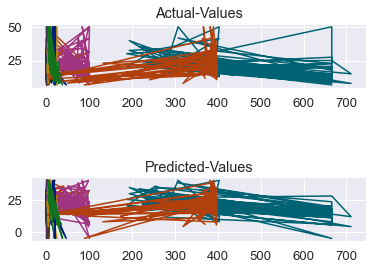

In [220]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")

In [221]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)

My Mean Squared Error:  25.819975173403602
My R-squared:  0.6593148619980076
